# Dashboard

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from plotnine import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando o dataset
df = pd.read_csv("previsaoreceita.csv", sep=';')

df

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,W09,71,71,2
1,462640,Paid Marketing,2015,W25,28,56,1
2,666461,Referral,2015,W50,40,40,1
3,183202,Referral,2013,W42,18,37,1
4,410993,Referral,2014,W29,0,37,1
...,...,...,...,...,...,...,...
715870,741230,Referral,2015,W51,0,40,1
715871,170503,Paid Marketing,2015,W25,9,37,1
715872,169910,Referral,2015,W04,37,37,1
715873,542301,Paid Marketing,2015,W11,56,56,1


In [3]:
# Inserindo a coluna "date" como datetime e corrigindo o formato

df['date'] = pd.to_datetime((df['year'].astype(str) + ' ' + df['week'] + " 1"), format="%Y W%W %w")
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,date
0,206461,Paid Marketing,2014,W09,71,71,2,2014-03-03
1,462640,Paid Marketing,2015,W25,28,56,1,2015-06-22
2,666461,Referral,2015,W50,40,40,1,2015-12-14
3,183202,Referral,2013,W42,18,37,1,2013-10-21
4,410993,Referral,2014,W29,0,37,1,2014-07-21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715875 entries, 0 to 715874
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   customer_id                   715875 non-null  int64         
 1   customer_acquisition_channel  715875 non-null  object        
 2   year                          715875 non-null  int64         
 3   week                          715875 non-null  object        
 4   net_revenue                   715875 non-null  int64         
 5   gross_revenue                 715875 non-null  int64         
 6   boxes                         715875 non-null  int64         
 7   date                          715875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 43.7+ MB


In [5]:
# agrupando por data e somando os valores para total semanal

df_dashboard = df.groupby(by='date', as_index=False).sum()
df_dashboard

,date,customer_id,year,net_revenue,gross_revenue,boxes
0,2013-01-14,6470312,183183,2310,4047,100
1,2013-01-21,35456050,964227,12342,20296,526
2,2013-01-28,62777958,1680855,25807,35253,929
3,2013-02-04,81441216,2141832,35713,44641,1177
4,2013-02-11,96700033,2500146,41898,52335,1361
...,...,...,...,...,...,...
150,2015-11-30,3660807526,13558935,245756,286294,6793
151,2015-12-07,3993578239,14604720,265797,310562,7321
152,2015-12-14,3801998856,13949845,261247,295797,6988
153,2015-12-21,2786513167,10349040,216590,240226,5492


In [6]:
df_dashboard = df_dashboard[['date', 'gross_revenue', 'net_revenue']].set_index('date')
df_dashboard

,gross_revenue,net_revenue
date,,
2013-01-14,4047,2310
2013-01-21,20296,12342
2013-01-28,35253,25807
2013-02-04,44641,35713
2013-02-11,52335,41898
...,...,...
2015-11-30,286294,245756
2015-12-07,310562,265797
2015-12-14,295797,261247


In [7]:
df_dashboard.isna().sum()

gross_revenue    0
net_revenue      0
dtype: int64

In [8]:
df_dashboard.describe()

,gross_revenue,net_revenue
count,155.000000,155.000000
mean,191349.161290,168186.458065
std,65795.835986,58405.262689
min,4047.000000,2310.000000
25%,158289.000000,134519.500000
50%,207843.000000,182827.000000
75%,233300.500000,206546.500000
max,363693.000000,323891.000000


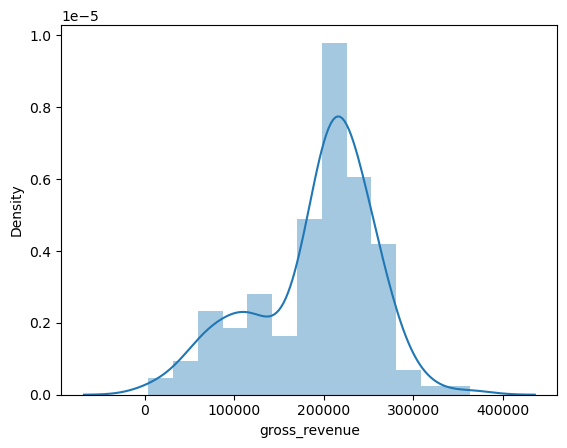

In [9]:
# Verificando a distribuição

sns.distplot(df_dashboard['gross_revenue']);

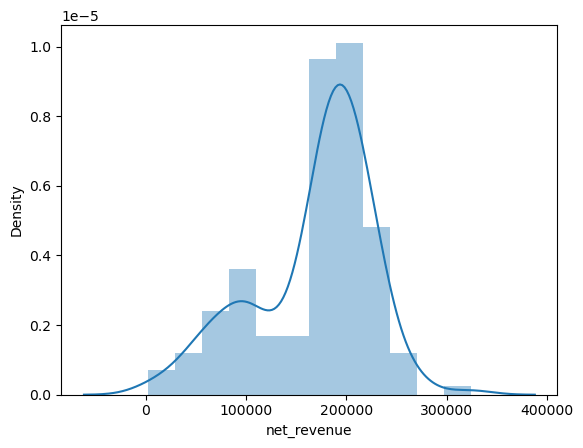

In [10]:
sns.distplot(df_dashboard['net_revenue']);

In [11]:
# Nível de densidade Leptocúrtica

df_dashboard.kurtosis()

gross_revenue    0.140999
net_revenue      0.183691
dtype: float64

In [12]:
# exibindo a variação para verificação da dispersão dos dados

df_dashboard['net_revenue'].var()

3411174709.7303715

In [13]:
df_dashboard['gross_revenue'].var()

4329092033.149147

In [14]:
# consultando o desvio padrão para analisar o quão os dados estão distantes da média

df_dashboard['net_revenue'].std()

58405.26268865137

In [15]:
df_dashboard['gross_revenue'].std()

65795.83598639922

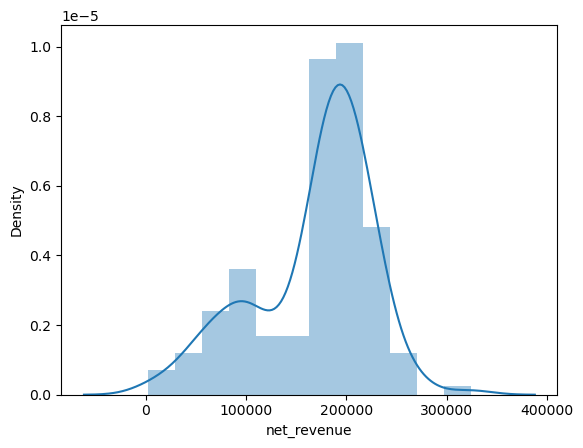

In [16]:
# Distribuição exponencial enviesada para esquerda

sns.distplot(df_dashboard['net_revenue']);

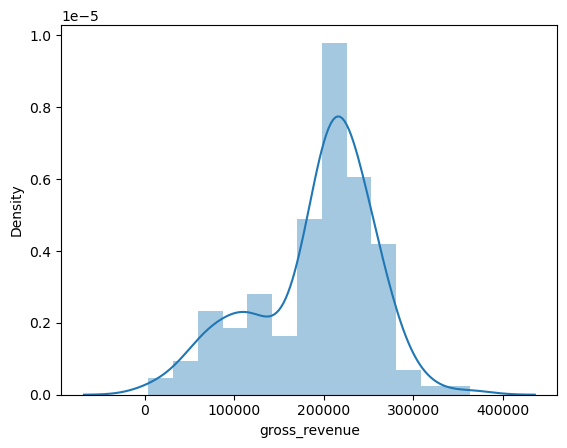

In [17]:
sns.distplot(df_dashboard['gross_revenue']);

In [18]:
# Teste de shapiro-Wilk
# Como o valor p está muito menor que o nível de significância de 0.05,
# há evidências suficientes para negar a hipótese nula e aceitar a alternativa
# de que a distribuição NÃO é normal e sim alternativa

shapiro(df_dashboard['gross_revenue'])

ShapiroResult(statistic=0.9377330541610718, pvalue=2.544611561461352e-06)

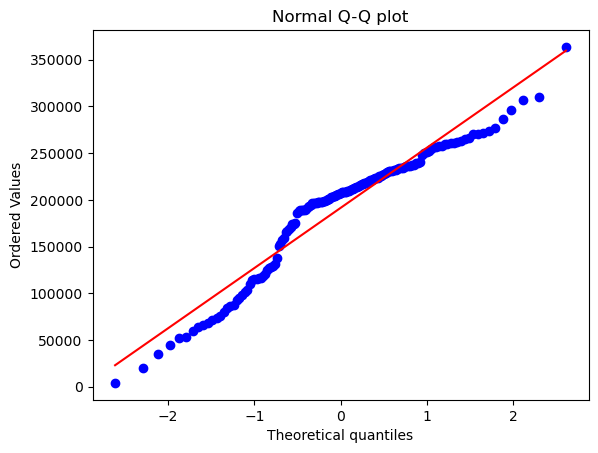

In [19]:
# Mais um teste para fortalecer a tese de que a distribuição não é normal

stats.probplot(df_dashboard['gross_revenue'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [20]:
# Mais um teste que demonstra haver evidências suficientes para rejeitar a hipótese nula
# e aceitar a hipótese alternativa de que a distribuição NÃO é normal e sim alternativa

shapiro(df_dashboard['net_revenue'])

ShapiroResult(statistic=0.9273481965065002, pvalue=4.522292726960586e-07)

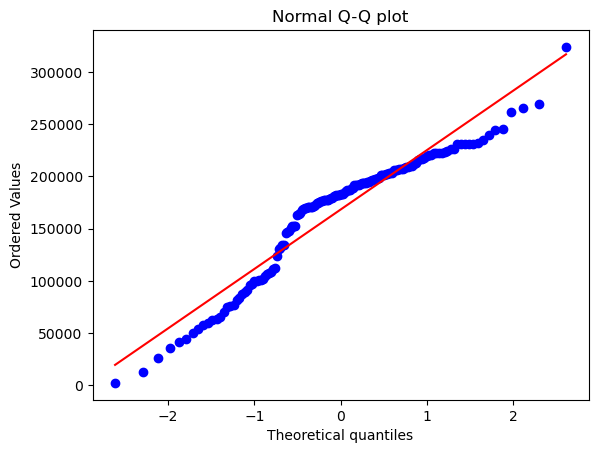

In [21]:
stats.probplot(df_dashboard['net_revenue'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [22]:
df_dashboard.mean(), df_dashboard.median()

(gross_revenue    191349.161290
 net_revenue      168186.458065
 dtype: float64,
 gross_revenue    207843.0
 net_revenue      182827.0
 dtype: float64)

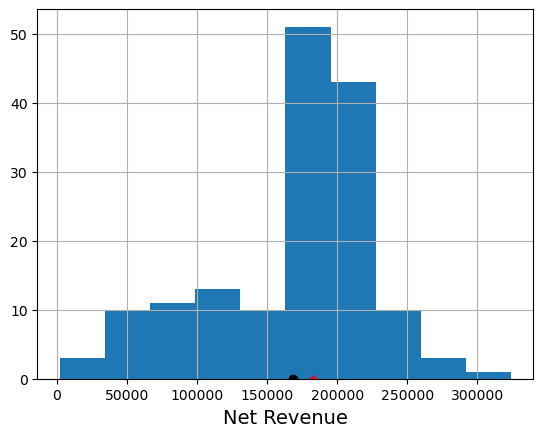

In [23]:
# Plota um histograma com a média em vermelho e a mediana em preto

nome = 'Net Revenue'
name = 'Gross Revenue'
df_dashboard['net_revenue'].hist()

plt.xlabel(nome, size=14)

# Média, mediana
plt.plot(df_dashboard['net_revenue'].median(),0, '*r')
plt.plot(df_dashboard['net_revenue'].mean(), 0, 'ok')
plt.show()

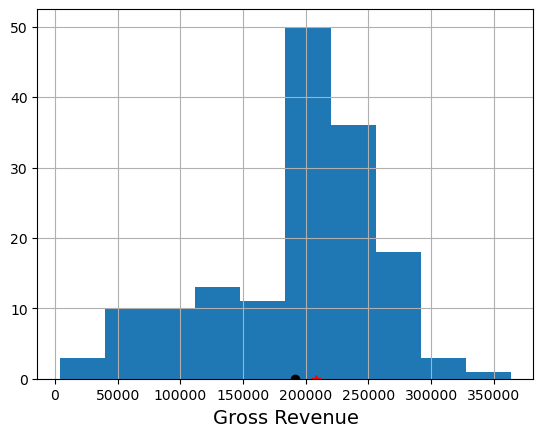

In [24]:
df_dashboard['gross_revenue'].hist()

plt.xlabel(name, size=14)

# Média, mediana
plt.plot(df_dashboard['gross_revenue'].median(),0, '*r')
plt.plot(df_dashboard['gross_revenue'].mean(), 0, 'ok')
plt.show()

## Resultado de vendas: Gross Revenue e Net Revenue

In [25]:
df_dashboard.sum()

gross_revenue    29659120
net_revenue      26068901
dtype: int64

## Maiores vendas

In [26]:
average_ticket = df.groupby(by=(['year', 'customer_acquisition_channel']), as_index=False).mean()
average_ticket.drop(columns=(['customer_id', 'net_revenue', 'boxes']), inplace=True)
average_ticket

,year,customer_acquisition_channel,gross_revenue
0,2013,Paid Marketing,42.076349
1,2013,Referral,39.821818
2,2014,Paid Marketing,41.347089
3,2014,Referral,39.619903
4,2015,Paid Marketing,42.039881
5,2015,Referral,40.728221


In [27]:
# Em 2013 o maior ticket médio foi de Paid Marketing com 42.076349 contra 39.821818 do Referral
# Em 2015 o maior ticket médio foi novamente de Paid Marketing com 42.039881 contra 40.728221 do Referral

average_ticket = average_ticket.drop(index=([2,3]))
average_ticket

,year,customer_acquisition_channel,gross_revenue
0,2013,Paid Marketing,42.076349
1,2013,Referral,39.821818
4,2015,Paid Marketing,42.039881
5,2015,Referral,40.728221


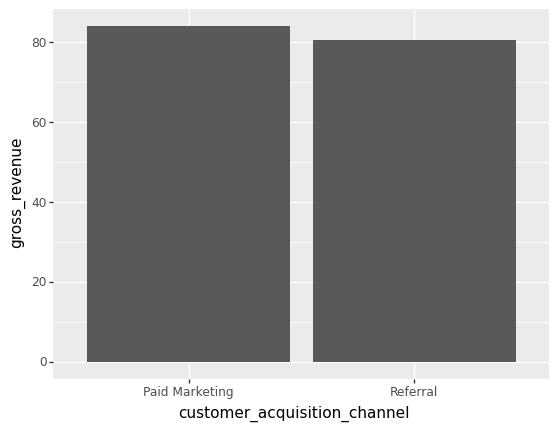

<ggplot: (34393215)>

In [28]:
(
    ggplot(average_ticket)
    + aes(x="customer_acquisition_channel", y="gross_revenue")
    + labs(
        x="customer_acquisition_channel",
        y="gross_revenue",
    )
    + geom_col()
)

## Número de clientes únicos por ano 2013x2015

In [29]:
unique_customers = df.groupby(by='year', as_index=False).nunique()
unique_customers.drop(columns=(['customer_acquisition_channel', 'week', 'net_revenue', 'boxes', 'date', 'gross_revenue']), inplace=True)

In [30]:
unique_customers = unique_customers.drop(index=(1))

In [31]:
# Em 2013 tivemos 35851 clientes únicos
# Em 2015 este número subiu para 51643

unique_customers

,year,customer_id
0,2013,35851
2,2015,51643


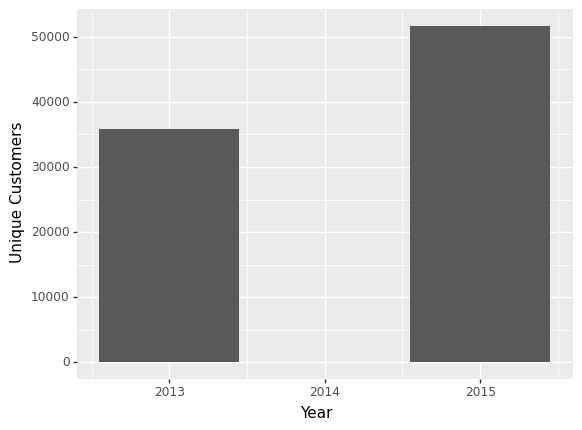

<ggplot: (34584197)>

In [32]:
(
    ggplot(unique_customers)
    + aes(x="year", y="customer_id")
    + labs(
        x="Year",
        y="Unique Customers",
    )
    + geom_col()
)

## Maiores compradores

In [33]:
biggest_buyers = df.groupby(by='customer_id').size()

In [34]:
biggest_buyers = biggest_buyers.sort_values(ascending=False)

In [35]:
biggest_buyers = biggest_buyers.head(10)
biggest_buyers = pd.DataFrame(biggest_buyers)
biggest_buyers

,0
customer_id,
69490,152
74972,150
84751,145
74011,144
75490,142
24772,142
74182,137
75153,137
93762,136


In [36]:
# Identificando os 10 maiores compradores para que a área de marketing possa fazer algum tipo de campanha.
# Da mesma forma, mas em sentido inverso, poderia ser feito o levantamento dos que compram menos.

data = [
    [69490, 152],
    [74972, 150],
    [84751, 145],
    [74011, 144],
    [75490, 142],
    [24772, 142],
    [74182, 137],
    [75153, 137],
    [93762, 136],
    [101602, 136]
]

# Converter a lista em um DataFrame
n_purchases = pd.DataFrame(data)

# Adicionar nomes de coluna aos cabeçalhos
n_purchases.columns = ['biggest_buyer', 'n_purchases']

# Exibir o DataFrame
n_purchases

,biggest_buyer,n_purchases
0,69490,152
1,74972,150
2,84751,145
3,74011,144
4,75490,142
5,24772,142
6,74182,137
7,75153,137
8,93762,136
9,101602,136


## Quantidade de vendas

In [37]:
amount_of_sales = df['customer_id'].count()
amount_of_sales

715875

## Total de clientes únicos

In [38]:
unique_customers = df['customer_id'].nunique()
unique_customers

118903

## Total de vendas 

In [39]:
sales_amount = df['gross_revenue'].sum()
sales_amount

29659120

## Lucro total

In [40]:
total_profit = df['net_revenue'].sum()
total_profit

26068901

## Total de descontos

In [41]:
discounts = sales_amount - total_profit
discounts

3590219

## Organizando dataframe

In [42]:
biggest_buyers.head(1)

,0
customer_id,
69490,152


In [43]:
new_df = biggest_buyers.head(1)

In [44]:
new_df['biggest_buy'] = biggest_buyers.head(1)

In [45]:
new_df['amount_of_sales'] = amount_of_sales

In [46]:
new_df['unique_customers'] = unique_customers

In [47]:
new_df['sales_amount'] = sales_amount

In [48]:
new_df['total_profit'] = total_profit

In [49]:
new_df['discounts'] = discounts

In [50]:
new_df = pd.DataFrame(new_df)

In [51]:
new_df.drop(columns=0, inplace=True)

In [52]:
new_df.index = ['Totals']

In [53]:
new_df.T

,Totals
biggest_buy,152
amount_of_sales,715875
unique_customers,118903
sales_amount,29659120
total_profit,26068901
discounts,3590219


In [54]:
# Criando o DataFrame
data = {
    'amount_of_sales': [715875],
    'unique_customers': [118903],
    'sales_amount': [29659120],
    'total_profit': [26068901],
    'discounts': [3590219]
}

table = pd.DataFrame(data)

# Adicionando cabeçalho para a primeira coluna
table.index = ['Totals']

# Formatando os valores das colunas
table['sales_amount'] = table['sales_amount'].apply(lambda x: '{:,.0f}'.format(x))
table['total_profit'] = table['total_profit'].apply(lambda x: '{:,.0f}'.format(x))
table['discounts'] = table['discounts'].apply(lambda x: '{:,.0f}'.format(x))

# Exibir DataFrame
table.T

,Totals
amount_of_sales,715875
unique_customers,118903
sales_amount,"29,659,120"
total_profit,"26,068,901"
discounts,"3,590,219"


# Linear Regression

In [55]:
# Importando as bibliotecas utilizadas no projeto

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from datetime import datetime
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet
from sklearn.model_selection import learning_curve
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import plotnine
from pmdarima.arima.utils import ndiffs
from sklearn.preprocessing import StandardScaler
import pmdarima as pm
import tensorflow as tf
import math
from matplotlib import rcParams

In [56]:
# Verificando o período que o dataset está apresentando

df_dashboard.head()

,gross_revenue,net_revenue
date,,
2013-01-14,4047,2310
2013-01-21,20296,12342
2013-01-28,35253,25807
2013-02-04,44641,35713
2013-02-11,52335,41898


In [57]:
# Agrupando e somando por semana

#df_grouped = df_dashboard.groupby(pd.Grouper(key='date', freq='W')).sum()

In [58]:
# Conferindo se foram agrupados por semana e se está apresentando o valor total para cada semana

# df_grouped

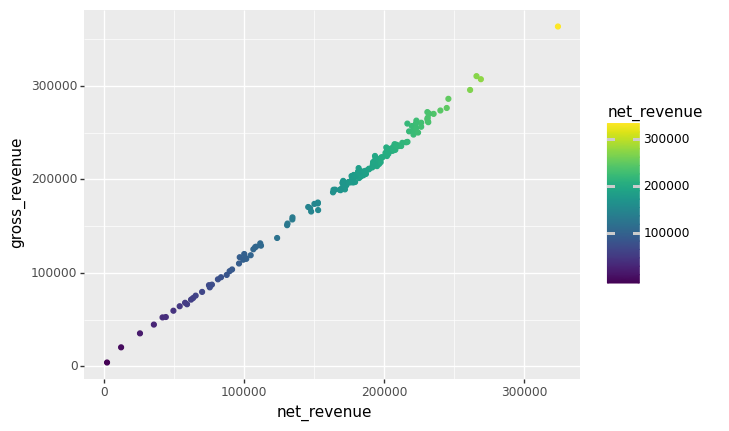

In [59]:
# Plotando gráfico de dispersão para avaliar a relação entre as features "gross_revenue" e "net_revenue"

plotnine.qplot(x='net_revenue', y='gross_revenue', data=df_dashboard, color='net_revenue').draw();

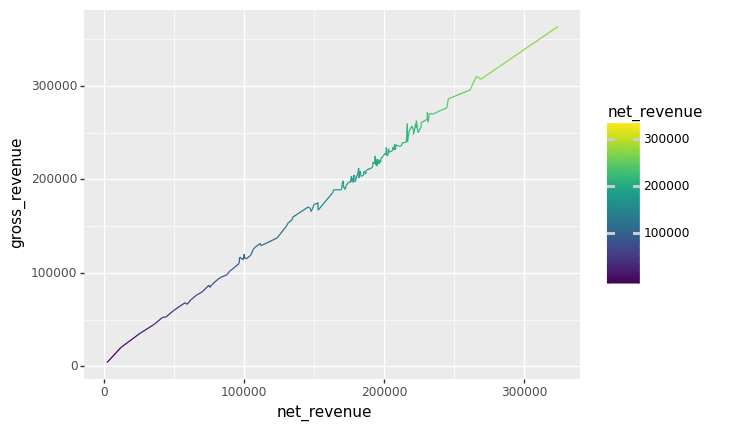

<ggplot: (48093088)>

In [60]:
(ggplot(data=df_dashboard,
           mapping=aes(x='net_revenue',
                          y='gross_revenue',
                          color='net_revenue'))
    + geom_line()
)

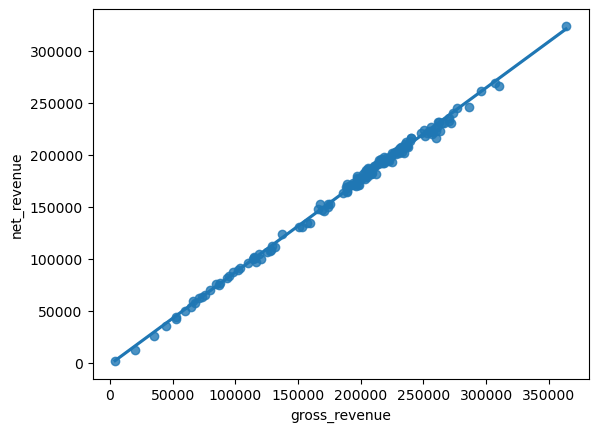

In [61]:
sns.regplot(df_dashboard['gross_revenue'], df_dashboard['net_revenue']);

In [62]:
# sns.regplot(df_grouped['gross_revenue'], df_grouped['net_revenue']);

In [63]:
# Acrescenta uma linha vazia ao dataset para previsão de receita futura com base na passada. 

# df_shift = df_grouped.shift(1)
# df_shift.drop(columns='gross_revenue', inplace=True)

In [64]:
# Acrescenta uma linha vazia ao dataset para previsão de receita futura com base na passada. 

df_shift = df_dashboard.shift(1)
df_shift.drop(columns='gross_revenue', inplace=True)

In [65]:
df_shift

,net_revenue
date,
2013-01-14,NaN
2013-01-21,2310.0
2013-01-28,12342.0
2013-02-04,25807.0
2013-02-11,35713.0
...,...
2015-11-30,222652.0
2015-12-07,245756.0
2015-12-14,265797.0


In [66]:
df_shift.dropna(inplace=True)

In [67]:
df_shift

,net_revenue
date,
2013-01-21,2310.0
2013-01-28,12342.0
2013-02-04,25807.0
2013-02-11,35713.0
2013-02-18,41898.0
...,...
2015-11-30,222652.0
2015-12-07,245756.0
2015-12-14,265797.0


In [68]:
# Vamos manter os últimos 30% do dataset para teste

train_size = 0.7
index = round(train_size*df_shift.shape[0])
df_train = df_shift.iloc[:index]
df_test = df_shift.iloc[index:]

In [69]:
df2 = df_shift.copy()
df2_train = df_train.copy()
df2_test = df_test.copy()

# Itera sobre o range de 1 a 6 (pois o último número é ignorado)
# da coluna "net_revenue", deslocando os dados para o futuro
# e armazenando em novas colunas, separando em treino e teste

# Construindo 6 features autoregressivas 

for i in range(1, 7):
    df2_train[f't - {i}'] = df_train.shift(i)
    df2_test[f't - {i}'] = df_test.shift(i)

df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.head()

,net_revenue,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6
date,,,,,,,
2013-03-04,49658.0,44234.0,41898.0,35713.0,25807.0,12342.0,2310.0
2013-03-11,54130.0,49658.0,44234.0,41898.0,35713.0,25807.0,12342.0
2013-03-18,59368.0,54130.0,49658.0,44234.0,41898.0,35713.0,25807.0
2013-03-25,57970.0,59368.0,54130.0,49658.0,44234.0,41898.0,35713.0
2013-04-01,63673.0,57970.0,59368.0,54130.0,49658.0,44234.0,41898.0


In [70]:
# Train Test Split
X2_train = df2_train.drop(columns = ['net_revenue'])
y2_train = df2_train['net_revenue']
X2_test = df2_test.drop(columns = ['net_revenue'])
y2_test = df2_test['net_revenue']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(102, 6) (102,) (40, 6) (40,)


In [71]:
from sklearn.preprocessing import RobustScaler

standard = RobustScaler()
X_train_standard_fit = standard.fit(X2_train)
X_train_standard = standard.transform(X2_train)
X_test_standard = standard.transform(X2_test)

In [72]:
X_train_standard.shape, X_test_standard.shape

((102, 6), (40, 6))

In [73]:
y_train = pd.DataFrame(y2_train)

In [74]:
y_test = pd.DataFrame(y2_test)

In [75]:
X_train_standard = pd.DataFrame(X_train_standard, columns=X2_train.columns)

In [76]:
X_test_standard = pd.DataFrame(X_test_standard, columns=X2_test.columns)

In [77]:
X_train_standard.shape, X_test_standard.shape, y2_train.shape, y2_test.shape

((102, 6), (40, 6), (102,), (40,))

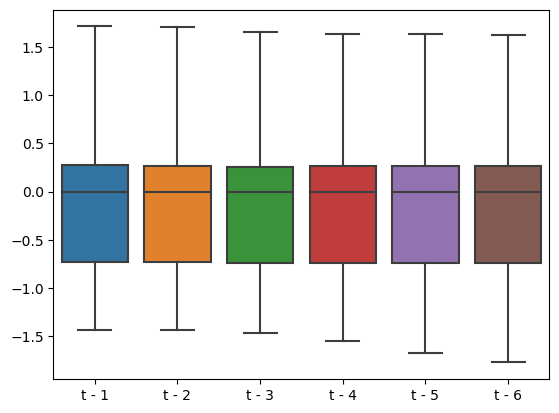

In [78]:
sns.boxplot(data = X_train_standard.iloc[:, :]);

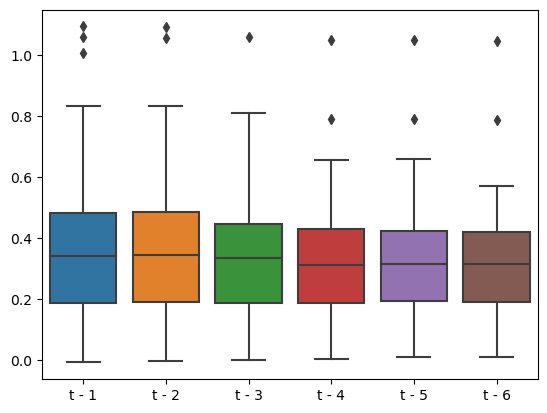

In [79]:
sns.boxplot(data = X_test_standard.iloc[0:, 0:]);

In [80]:
# Saving the indexes corresponding to rows 
# without the absurd -1 value
# and without the mansion

temp1 = (X_test_standard['t - 1'] > 0) & (X_test_standard['t - 1'] < 0.82)
temp2 = (X_test_standard['t - 2'] > 0) & (X_test_standard['t - 2'] < 0.82)
temp3 = (X_test_standard['t - 3'] > 0) & (X_test_standard['t - 3'] < 0.8)
temp4 = (X_test_standard['t - 4'] > 0) & (X_test_standard['t - 4'] < 0.7)
temp5 = (X_test_standard['t - 5'] > 0) & (X_test_standard['t - 5'] < 0.7)
#temp6 = (X_test_standard['t - 6'] > 0) & (X_test_standard['t - 6'] < 0.7)

# Applying the boolean filteraing

temp1 = X_test_standard[temp1].reset_index(drop=True)
temp2 = X_test_standard[temp2].reset_index(drop=True)
temp3 = X_test_standard[temp3].reset_index(drop=True)
temp4 = X_test_standard[temp4].reset_index(drop=True)
temp5 = X_test_standard[temp5].reset_index(drop=True)
#temp6 = X_test_standard[temp6].reset_index(drop=True)

In [81]:
temp1 = pd.DataFrame(temp1['t - 1'])
temp2 = pd.DataFrame(temp2['t - 2'])
temp3 = pd.DataFrame(temp3['t - 3'])
temp4 = pd.DataFrame(temp4['t - 4'])
temp5 = pd.DataFrame(temp5['t - 5'])
#temp6 = pd.DataFrame(temp6['t - 6'])

In [82]:
temp1.shape, temp2.shape, temp3.shape, temp4.shape, temp5.shape#, temp6.shape

((34, 1), (35, 1), (38, 1), (38, 1), (38, 1))

In [83]:
temporario = pd.concat([temp1, temp2, temp3, temp4, temp5], axis=1)

In [84]:
temporario.isna().sum()

t - 1    4
t - 2    3
t - 3    0
t - 4    0
t - 5    0
dtype: int64

In [85]:
temporario['t - 2'].median()
temporario['t - 1'].median()
mediana = temporario['t - 1'].median()
mediana = temporario['t - 2'].median()
temporario['t - 1'].fillna(mediana, inplace=True)
temporario['t - 2'].fillna(mediana, inplace=True)
temporario.isnull().sum()

t - 1    0
t - 2    0
t - 3    0
t - 4    0
t - 5    0
dtype: int64

In [86]:
temporario.isna().sum()

t - 1    0
t - 2    0
t - 3    0
t - 4    0
t - 5    0
dtype: int64

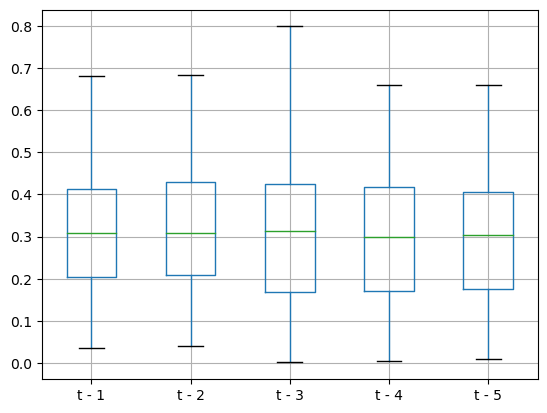

In [87]:
temporario.boxplot();

R2:  0.36030746869856944


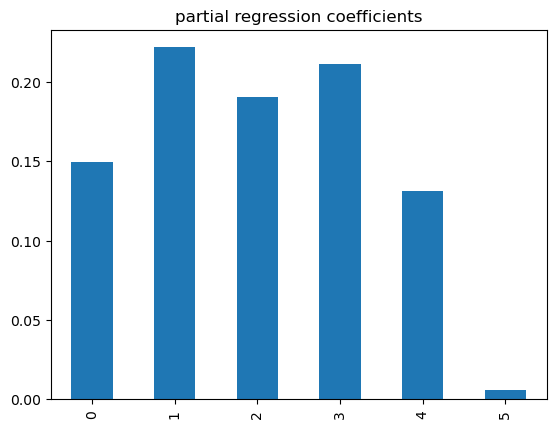

In [88]:
# Predict and measure R2
model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [89]:
X_train_standard.drop(columns='t - 6', inplace=True)

In [90]:
X_test_standard = temporario

In [91]:
X_train_standard.shape, y_train.shape, X_test_standard.shape, y_test.shape

((102, 5), (102, 1), (38, 5), (40, 1))

In [92]:
X_train_standard.head()

,t - 1,t - 2,t - 3,t - 4,t - 5
0,-1.430516,-1.440471,-1.461336,-1.545032,-1.672967
1,-1.369555,-1.414399,-1.394427,-1.439212,-1.530050
2,-1.319294,-1.353862,-1.369157,-1.373141,-1.424907
3,-1.260424,-1.303950,-1.310481,-1.348187,-1.359260
4,-1.276136,-1.245489,-1.262103,-1.290246,-1.334465


In [93]:
X_test_standard.head()

,t - 1,t - 2,t - 3,t - 4,t - 5
0,0.429844,0.593553,0.391493,0.228918,0.338162
1,0.465000,0.433035,0.577062,0.390415,0.232542
2,0.357791,0.467947,0.421480,0.573660,0.393004
3,0.434947,0.361482,0.455318,0.420026,0.575077
4,0.034757,0.438103,0.352127,0.453441,0.422426


In [94]:
# Cria o modelo de regressão linear
regressor = LinearRegression()

# Treina o modelo
regressor.fit(X_train_standard, y_train)

LinearRegression()

In [95]:
X_test_standard.shape, y_test[0:38].shape

((38, 5), (38, 1))

In [96]:
X2_train.drop(columns='t - 6', inplace=True)

In [97]:
X2_test.drop(columns='t - 6', inplace=True)

In [98]:
# Pontuação do modelo com base no seu coeficiente de determinação r2
# Mostra o quanto as features conseguem explicar o target.
# Também demonstra o quanto o modelo consegue captar a variância dos dados.

regressor.score(X_test_standard, y_test[0:38])

0.27555296742943536

In [99]:
# Prevendo o receita

linreg_pred = regressor.predict(X_test_standard)

In [100]:
linreg_mape = mean_absolute_percentage_error(y_test[0:38], linreg_pred)

In [101]:
linreg_mape

0.07430190233012897

In [102]:
last_months = X_test_standard.iloc[-24:] # Separando os últimos seis meses para previsão dos seis meses futuros

forecast_months = regressor.predict(last_months) # Prevendo os próximos seis meses

In [103]:
# Verificando a porcentagem de erro do modelo

linreg_mape = mean_absolute_percentage_error(y_test[-24:], forecast_months)

print('MAPE =', round(linreg_mape, 2))

MAPE = 0.1


In [104]:
last_months = X_test_standard.iloc[-24:]
forecast_months = regressor.predict(last_months)

# Printa a receita prevista
print("Previsão de receita a cada semana para os próximos seis meses:")
for i in range(len(forecast_months)):
    print(f"Week {i+1}: {forecast_months[i]}")

Previsão de receita a cada semana para os próximos seis meses:
Week 1: [194105.23030792]
Week 2: [196285.47622119]
Week 3: [196359.41513685]
Week 4: [195828.22730027]
Week 5: [192627.18138635]
Week 6: [188985.5443952]
Week 7: [187291.88600663]
Week 8: [184007.75931071]
Week 9: [184871.54328657]
Week 10: [186698.54400539]
Week 11: [185174.47800587]
Week 12: [194890.52180795]
Week 13: [199336.42143687]
Week 14: [200094.35878845]
Week 15: [203371.68031663]
Week 16: [215341.30552406]
Week 17: [211690.90732219]
Week 18: [200876.1074333]
Week 19: [210799.51447878]
Week 20: [221536.95750903]
Week 21: [208899.77908536]
Week 22: [192776.97908012]
Week 23: [210695.10194113]
Week 24: [213591.85642196]


In [105]:
X_train_standard.shape, X_test_standard.shape

((102, 5), (38, 5))

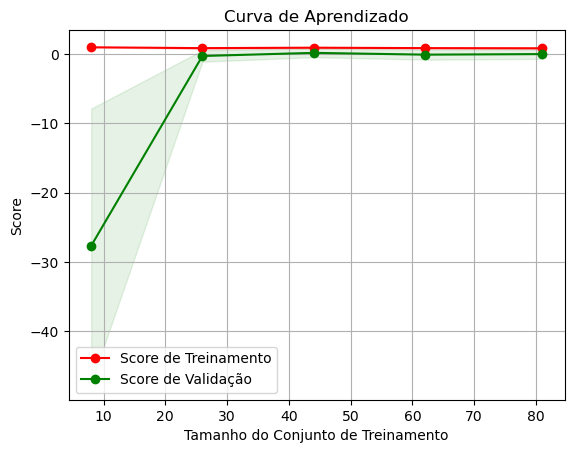

In [106]:
X, y = X_train_standard, y_train

# Definir o modelo de aprendizado de máquina
model = LinearRegression()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")

plt.show()

# ARIMA

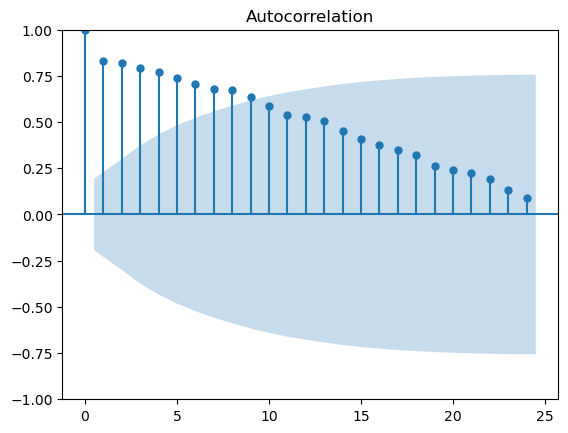

In [107]:
# Medindo os efeitos indiretos de cada semana nos seis meses.

plot_acf(y_train, lags=24);

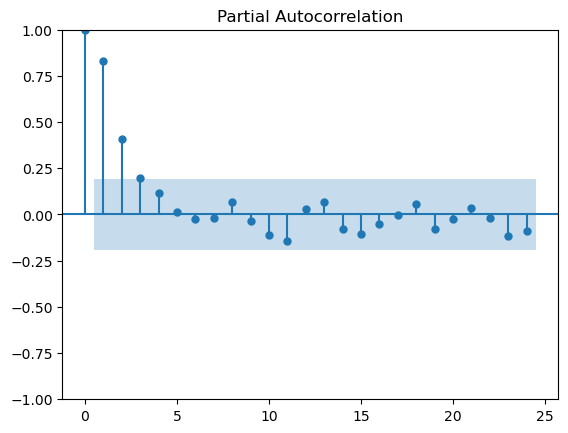

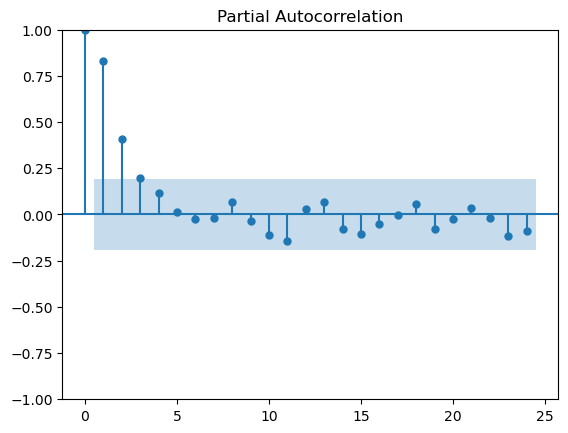

In [108]:
# Medindo a correlação direta de seis meses atrás,
# para saber quantas semanas passadas tem impacto significante
# na previsão.

plot_pacf(y_train, ax=None, lags=24, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None)

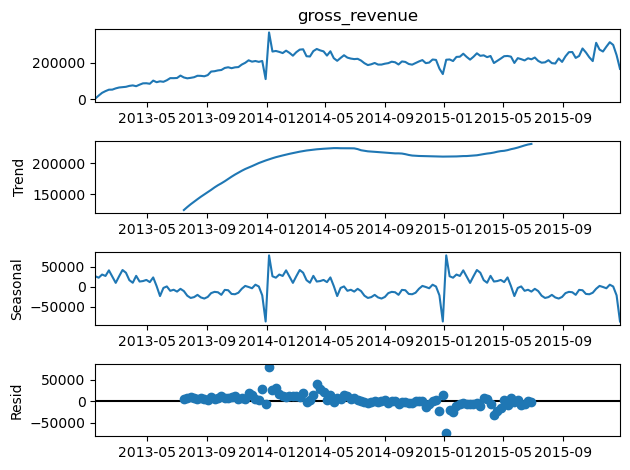

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva do dados do target

result_add = seasonal_decompose(df_dashboard['gross_revenue'], model='additive')
result_add.plot();

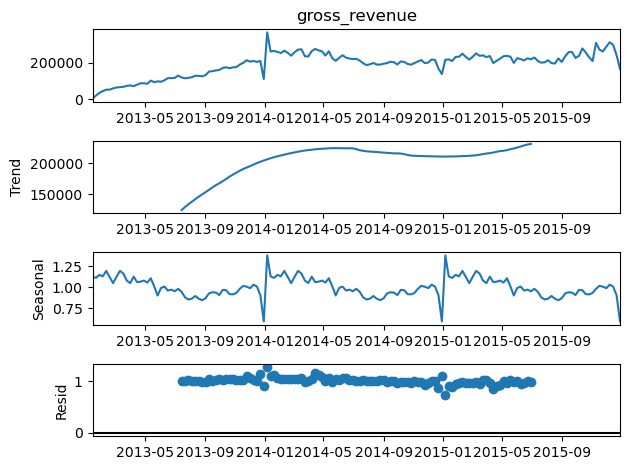

In [110]:
# Decomposição multiplicativa dos dados do target

result_mul = seasonal_decompose(df_dashboard['gross_revenue'], model='multiplicative')
result_mul.plot();

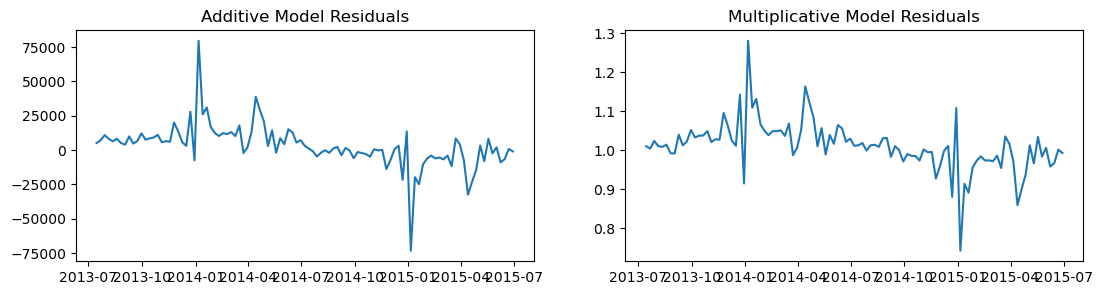

In [111]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive Model Residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative Model Residuals");

In [112]:
# p-value > que 0.05 indica que a série não é estacionária

from statsmodels.tsa.stattools import adfuller

adfuller(y_test)[1]  # p-value

0.9813284523652598

In [113]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  0.010992422838257326
multiplicative resid:  0.41189637486137687


In [114]:
# Número de diferenças necessárias para que as séries temporais se tornem estacionárias

ndiffs(y_test)

1

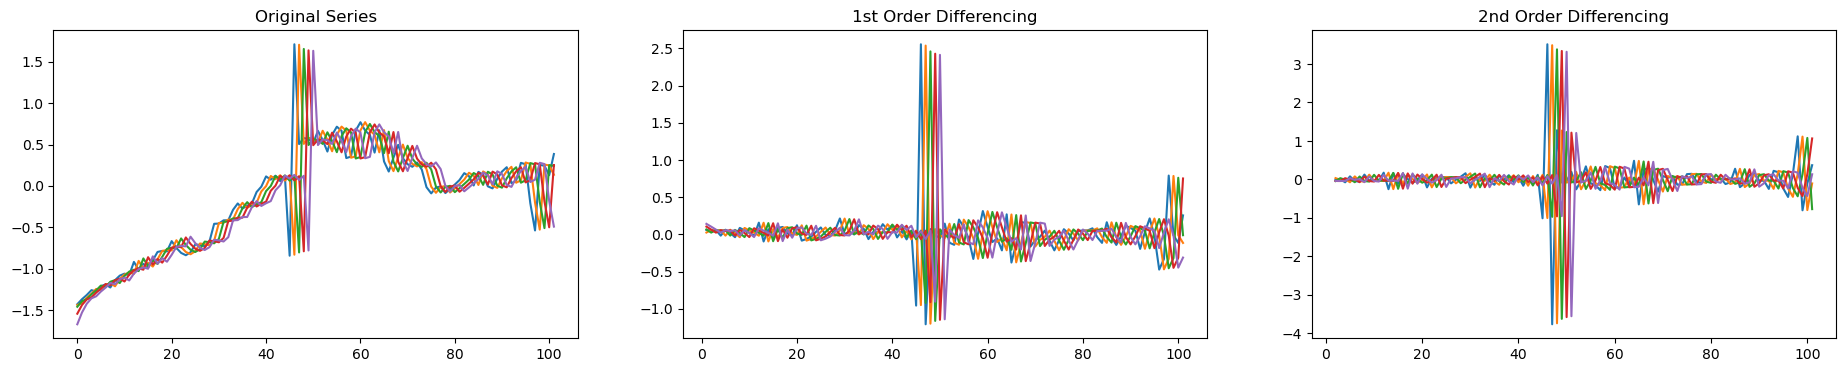

In [115]:
# Comparando e plotando a diferença entre os dados
# para verificar a estacionaridade

zero_diff = X_train_standard
first_order_diff = X_train_standard.diff(1)
second_order_diff = X_train_standard.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(23,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

In [179]:
arima = pm.auto_arima(y_test, scoring='mae',
                       start_p=0, max_p=5,
                       start_q=0, max_q=5,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=899.887, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=900.247, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=900.843, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=899.887, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=902.746, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.307 seconds


In [117]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -447.943
Date:                Tue, 13 Jun 2023   AIC                            899.887
Time:                        17:43:20   BIC                            903.214
Sample:                    03-30-2015   HQIC                           901.081
                         - 12-28-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         21.3929    148.982      0.144      0.886    -270.606     313.392
sigma2      5.545e+08    9.4e+07      5.897      0.000     3.7e+08    7.39e+08
Ljung-Box (L1) (Q):                   2.80   Jarque-

In [118]:
residuals = arima.resid()

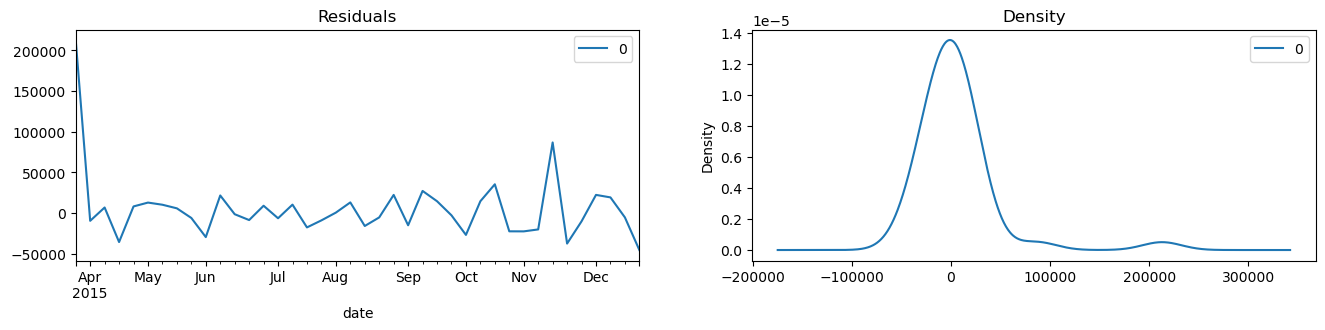

In [119]:
residuals = pd.DataFrame(residuals)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);

In [120]:
# Resíduos não correlacionados, indicando que os dados foram aproveitados no treino,
# Não passando dados importantes para os resíduos.

sm.stats.diagnostic.acorr_ljungbox(residuals, lags=None, boxpierce=False, model_df=0, period=None, return_df=True, auto_lag=False)

,lb_stat,lb_pvalue
1,0.605222,0.436593
2,0.905360,0.635922
3,1.768936,0.621718
4,2.475131,0.649094
5,2.629943,0.756811
6,3.133026,0.791975
7,3.245621,0.861389
8,3.257468,0.917177


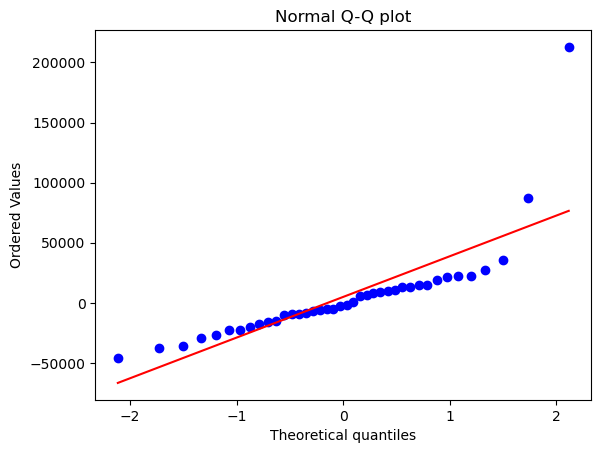

In [121]:
stats.probplot(residuals[0], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [122]:
# Salvando a previsão na variável 'arima_predict' para comparação do score dos modelos

arima_predict = arima.predict(n_periods=27)

In [123]:
# Verificando a porcentagem de erro do nosso modelo

arima_mape = mean_absolute_percentage_error(y_test[-27:], arima_predict)

print('MAPE =', round(arima_mape, 2))

MAPE = 0.14


In [124]:
#Prevendo os 6 meses futuros baseado nos últimos seis meses

arima.predict(n_periods=27)

2016-01-04    217445.715677
2016-01-11    218322.824245
2016-01-18    219221.325706
2016-01-25    220141.220058
2016-02-01    221082.507303
2016-02-08    222045.187439
2016-02-15    223029.260467
2016-02-22    224034.726388
2016-02-29    225061.585200
2016-03-07    226109.836904
2016-03-14    227179.481500
2016-03-21    228270.518987
2016-03-28    229382.949367
2016-04-04    230516.772639
2016-04-11    231671.988802
2016-04-18    232848.597858
2016-04-25    234046.599805
2016-05-02    235265.994645
2016-05-09    236506.782376
2016-05-16    237768.962999
2016-05-23    239052.536514
2016-05-30    240357.502921
2016-06-06    241683.862220
2016-06-13    243031.614411
2016-06-20    244400.759494
2016-06-27    245791.297468
2016-07-04    247203.228335
Freq: W-MON, dtype: float64

In [125]:
first_order_diff['t - 5']

0           NaN
1      0.142917
2      0.105142
3      0.065648
4      0.024794
         ...   
97     0.028594
98     0.204118
99    -0.015804
100   -0.445469
101   -0.310438
Name: t - 5, Length: 102, dtype: float64

# Deep Learning

In [126]:
# Deep learning simples com duas camadas, ativação linear e função de perda 'mean absolute error'

simpledeep = Sequential()

simpledeep.add(layers.Dense(3, activation="relu"))
simpledeep.add(layers.Dense(1, activation="linear"))

simpledeep.compile(loss='mae', optimizer='adam')

#Parada antecipada quando o mean absolute error parar de melhorar por 30 períodos de teste.
#Armazena o melhor valor encontrado
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

simpledeep.fit(X_train_standard, y2_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_standard, y2_test[0:38]))

Epoch 1/1000
7/7 [==============================] - 1s 29ms/step - loss: 159598.6250 - val_loss: 203850.9844
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.5938 - val_loss: 203850.9531
Epoch 3/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.5625 - val_loss: 203850.9219
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.5312 - val_loss: 203850.9219
Epoch 5/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.5156 - val_loss: 203850.8906
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.4844 - val_loss: 203850.8594
Epoch 7/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.4531 - val_loss: 203850.8438
Epoch 8/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.4375 - val_loss: 203850.8125
Epoch 9/1000
7/7 [==============================] - 0s 6ms/step - loss: 159598.4062 - val_loss: 203850.7969
Epoch 10/1000
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 159595.9531 - val_loss: 203846.7344
Epoch 77/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.9062 - val_loss: 203846.6406
Epoch 78/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.8281 - val_loss: 203846.5469
Epoch 79/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.7969 - val_loss: 203846.4375
Epoch 80/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.7188 - val_loss: 203846.3281
Epoch 81/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.6719 - val_loss: 203846.2344
Epoch 82/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.6250 - val_loss: 203846.1250
Epoch 83/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.5469 - val_loss: 203846.0000
Epoch 84/1000
7/7 [==============================] - 0s 6ms/step - loss: 159595.4844 - val_loss: 203845.9062
Epoch 85/1000
7/7 [==============

Epoch 151/1000
7/7 [==============================] - 0s 5ms/step - loss: 159590.2500 - val_loss: 203836.5156
Epoch 152/1000
7/7 [==============================] - 0s 6ms/step - loss: 159590.1562 - val_loss: 203836.3281
Epoch 153/1000
7/7 [==============================] - 0s 6ms/step - loss: 159590.0625 - val_loss: 203836.1562
Epoch 154/1000
7/7 [==============================] - 0s 6ms/step - loss: 159589.9844 - val_loss: 203835.9688
Epoch 155/1000
7/7 [==============================] - 0s 6ms/step - loss: 159589.8594 - val_loss: 203835.8125
Epoch 156/1000
7/7 [==============================] - 0s 6ms/step - loss: 159589.7812 - val_loss: 203835.6406
Epoch 157/1000
7/7 [==============================] - 0s 7ms/step - loss: 159589.6875 - val_loss: 203835.4688
Epoch 158/1000
7/7 [==============================] - 0s 5ms/step - loss: 159589.5938 - val_loss: 203835.2969
Epoch 159/1000
7/7 [==============================] - 0s 6ms/step - loss: 159589.4844 - val_loss: 203835.0938
Epoch 160/

7/7 [==============================] - 0s 5ms/step - loss: 159581.9375 - val_loss: 203821.4531
Epoch 226/1000
7/7 [==============================] - 0s 5ms/step - loss: 159581.8125 - val_loss: 203821.2031
Epoch 227/1000
7/7 [==============================] - 0s 6ms/step - loss: 159581.6719 - val_loss: 203820.9688
Epoch 228/1000
7/7 [==============================] - 0s 6ms/step - loss: 159581.5469 - val_loss: 203820.7188
Epoch 229/1000
7/7 [==============================] - 0s 6ms/step - loss: 159581.4062 - val_loss: 203820.5000
Epoch 230/1000
7/7 [==============================] - 0s 6ms/step - loss: 159581.2969 - val_loss: 203820.2344
Epoch 231/1000
7/7 [==============================] - 0s 6ms/step - loss: 159581.1406 - val_loss: 203820.0000
Epoch 232/1000
7/7 [==============================] - 0s 6ms/step - loss: 159581.0156 - val_loss: 203819.7500
Epoch 233/1000
7/7 [==============================] - 0s 6ms/step - loss: 159580.8750 - val_loss: 203819.5156
Epoch 234/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159571.3125 - val_loss: 203802.1094
Epoch 300/1000
7/7 [==============================] - 0s 6ms/step - loss: 159571.1562 - val_loss: 203801.7969
Epoch 301/1000
7/7 [==============================] - 0s 6ms/step - loss: 159571.0000 - val_loss: 203801.5312
Epoch 302/1000
7/7 [==============================] - 0s 6ms/step - loss: 159570.8438 - val_loss: 203801.2344
Epoch 303/1000
7/7 [==============================] - 0s 6ms/step - loss: 159570.6875 - val_loss: 203800.9531
Epoch 304/1000
7/7 [==============================] - 0s 6ms/step - loss: 159570.5312 - val_loss: 203800.6562
Epoch 305/1000
7/7 [==============================] - 0s 6ms/step - loss: 159570.3594 - val_loss: 203800.3594
Epoch 306/1000
7/7 [==============================] - 0s 6ms/step - loss: 159570.2031 - val_loss: 203800.0625
Epoch 307/1000
7/7 [==============================] - 0s 6ms/step - loss: 159570.0469 - val_loss: 203799.7656
Epoch 308/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159558.7812 - val_loss: 203779.2500
Epoch 374/1000
7/7 [==============================] - 0s 6ms/step - loss: 159558.5938 - val_loss: 203778.9219
Epoch 375/1000
7/7 [==============================] - 0s 6ms/step - loss: 159558.4062 - val_loss: 203778.5625
Epoch 376/1000
7/7 [==============================] - 0s 6ms/step - loss: 159558.2188 - val_loss: 203778.2344
Epoch 377/1000
7/7 [==============================] - 0s 6ms/step - loss: 159558.0625 - val_loss: 203777.8750
Epoch 378/1000
7/7 [==============================] - 0s 6ms/step - loss: 159557.8594 - val_loss: 203777.5469
Epoch 379/1000
7/7 [==============================] - 0s 6ms/step - loss: 159557.6562 - val_loss: 203777.2031
Epoch 380/1000
7/7 [==============================] - 0s 6ms/step - loss: 159557.4844 - val_loss: 203776.8906
Epoch 381/1000
7/7 [==============================] - 0s 6ms/step - loss: 159557.2969 - val_loss: 203776.5469
Epoch 382/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159544.2031 - val_loss: 203752.5781
Epoch 448/1000
7/7 [==============================] - 0s 6ms/step - loss: 159543.9844 - val_loss: 203752.2031
Epoch 449/1000
7/7 [==============================] - 0s 6ms/step - loss: 159543.7812 - val_loss: 203751.8125
Epoch 450/1000
7/7 [==============================] - 0s 6ms/step - loss: 159543.5781 - val_loss: 203751.4531
Epoch 451/1000
7/7 [==============================] - 0s 6ms/step - loss: 159543.3594 - val_loss: 203751.0469
Epoch 452/1000
7/7 [==============================] - 0s 6ms/step - loss: 159543.1719 - val_loss: 203750.6719
Epoch 453/1000
7/7 [==============================] - 0s 5ms/step - loss: 159542.9219 - val_loss: 203750.2969
Epoch 454/1000
7/7 [==============================] - 0s 6ms/step - loss: 159542.7500 - val_loss: 203749.9219
Epoch 455/1000
7/7 [==============================] - 0s 6ms/step - loss: 159542.5156 - val_loss: 203749.5469
Epoch 456/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159527.9375 - val_loss: 203722.8438
Epoch 522/1000
7/7 [==============================] - 0s 5ms/step - loss: 159527.7031 - val_loss: 203722.3906
Epoch 523/1000
7/7 [==============================] - 0s 6ms/step - loss: 159527.4531 - val_loss: 203722.0156
Epoch 524/1000
7/7 [==============================] - 0s 6ms/step - loss: 159527.2500 - val_loss: 203721.5781
Epoch 525/1000
7/7 [==============================] - 0s 6ms/step - loss: 159527.0156 - val_loss: 203721.1406
Epoch 526/1000
7/7 [==============================] - 0s 6ms/step - loss: 159526.7812 - val_loss: 203720.7031
Epoch 527/1000
7/7 [==============================] - 0s 6ms/step - loss: 159526.5312 - val_loss: 203720.2969
Epoch 528/1000
7/7 [==============================] - 0s 6ms/step - loss: 159526.3125 - val_loss: 203719.8750
Epoch 529/1000
7/7 [==============================] - 0s 6ms/step - loss: 159526.0938 - val_loss: 203719.4531
Epoch 530/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159510.1094 - val_loss: 203690.1562
Epoch 596/1000
7/7 [==============================] - 0s 6ms/step - loss: 159509.8438 - val_loss: 203689.7031
Epoch 597/1000
7/7 [==============================] - 0s 6ms/step - loss: 159509.5938 - val_loss: 203689.2344
Epoch 598/1000
7/7 [==============================] - 0s 6ms/step - loss: 159509.3594 - val_loss: 203688.7656
Epoch 599/1000
7/7 [==============================] - 0s 6ms/step - loss: 159509.0938 - val_loss: 203688.2812
Epoch 600/1000
7/7 [==============================] - 0s 6ms/step - loss: 159508.8281 - val_loss: 203687.8281
Epoch 601/1000
7/7 [==============================] - 0s 6ms/step - loss: 159508.5781 - val_loss: 203687.3750
Epoch 602/1000
7/7 [==============================] - 0s 6ms/step - loss: 159508.3281 - val_loss: 203686.9062
Epoch 603/1000
7/7 [==============================] - 0s 6ms/step - loss: 159508.0781 - val_loss: 203686.4688
Epoch 604/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159490.5625 - val_loss: 203654.3125
Epoch 670/1000
7/7 [==============================] - 0s 6ms/step - loss: 159490.2812 - val_loss: 203653.8281
Epoch 671/1000
7/7 [==============================] - 0s 6ms/step - loss: 159490.0312 - val_loss: 203653.2969
Epoch 672/1000
7/7 [==============================] - 0s 6ms/step - loss: 159489.7500 - val_loss: 203652.7969
Epoch 673/1000
7/7 [==============================] - 0s 6ms/step - loss: 159489.4531 - val_loss: 203652.2969
Epoch 674/1000
7/7 [==============================] - 0s 6ms/step - loss: 159489.1719 - val_loss: 203651.7969
Epoch 675/1000
7/7 [==============================] - 0s 6ms/step - loss: 159488.9219 - val_loss: 203651.3125
Epoch 676/1000
7/7 [==============================] - 0s 6ms/step - loss: 159488.6562 - val_loss: 203650.8281
Epoch 677/1000
7/7 [==============================] - 0s 6ms/step - loss: 159488.3750 - val_loss: 203650.3125
Epoch 678/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159469.6094 - val_loss: 203615.8750
Epoch 744/1000
7/7 [==============================] - 0s 6ms/step - loss: 159469.2969 - val_loss: 203615.3594
Epoch 745/1000
7/7 [==============================] - 0s 6ms/step - loss: 159469.0156 - val_loss: 203614.8125
Epoch 746/1000
7/7 [==============================] - 0s 6ms/step - loss: 159468.7031 - val_loss: 203614.2656
Epoch 747/1000
7/7 [==============================] - 0s 6ms/step - loss: 159468.4062 - val_loss: 203613.7031
Epoch 748/1000
7/7 [==============================] - 0s 6ms/step - loss: 159468.1250 - val_loss: 203613.1562
Epoch 749/1000
7/7 [==============================] - 0s 6ms/step - loss: 159467.8281 - val_loss: 203612.6094
Epoch 750/1000
7/7 [==============================] - 0s 6ms/step - loss: 159467.5156 - val_loss: 203612.0625
Epoch 751/1000
7/7 [==============================] - 0s 6ms/step - loss: 159467.2344 - val_loss: 203611.5312
Epoch 752/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159446.9531 - val_loss: 203574.2969
Epoch 818/1000
7/7 [==============================] - 0s 6ms/step - loss: 159446.6250 - val_loss: 203573.7031
Epoch 819/1000
7/7 [==============================] - 0s 6ms/step - loss: 159446.3125 - val_loss: 203573.1094
Epoch 820/1000
7/7 [==============================] - 0s 6ms/step - loss: 159446.0000 - val_loss: 203572.5000
Epoch 821/1000
7/7 [==============================] - 0s 6ms/step - loss: 159445.6719 - val_loss: 203571.9062
Epoch 822/1000
7/7 [==============================] - 0s 6ms/step - loss: 159445.3594 - val_loss: 203571.3438
Epoch 823/1000
7/7 [==============================] - 0s 6ms/step - loss: 159445.0469 - val_loss: 203570.7969
Epoch 824/1000
7/7 [==============================] - 0s 6ms/step - loss: 159444.7344 - val_loss: 203570.2031
Epoch 825/1000
7/7 [==============================] - 0s 6ms/step - loss: 159444.4062 - val_loss: 203569.6250
Epoch 826/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159422.8750 - val_loss: 203530.0469
Epoch 892/1000
7/7 [==============================] - 0s 6ms/step - loss: 159422.5469 - val_loss: 203529.4531
Epoch 893/1000
7/7 [==============================] - 0s 6ms/step - loss: 159422.2188 - val_loss: 203528.8438
Epoch 894/1000
7/7 [==============================] - 0s 6ms/step - loss: 159421.8906 - val_loss: 203528.2344
Epoch 895/1000
7/7 [==============================] - 0s 6ms/step - loss: 159421.5625 - val_loss: 203527.6094
Epoch 896/1000
7/7 [==============================] - 0s 6ms/step - loss: 159421.2031 - val_loss: 203526.9688
Epoch 897/1000
7/7 [==============================] - 0s 6ms/step - loss: 159420.8750 - val_loss: 203526.3125
Epoch 898/1000
7/7 [==============================] - 0s 6ms/step - loss: 159420.4844 - val_loss: 203525.6875
Epoch 899/1000
7/7 [==============================] - 0s 6ms/step - loss: 159420.1562 - val_loss: 203525.0469
Epoch 900/1000
7/7 [=====

7/7 [==============================] - 0s 6ms/step - loss: 159397.3594 - val_loss: 203483.1562
Epoch 966/1000
7/7 [==============================] - 0s 6ms/step - loss: 159397.0156 - val_loss: 203482.4844
Epoch 967/1000
7/7 [==============================] - 0s 5ms/step - loss: 159396.6406 - val_loss: 203481.8438
Epoch 968/1000
7/7 [==============================] - 0s 6ms/step - loss: 159396.2969 - val_loss: 203481.1875
Epoch 969/1000
7/7 [==============================] - 0s 6ms/step - loss: 159395.9375 - val_loss: 203480.5312
Epoch 970/1000
7/7 [==============================] - 0s 6ms/step - loss: 159395.5938 - val_loss: 203479.8906
Epoch 971/1000
7/7 [==============================] - 0s 6ms/step - loss: 159395.2500 - val_loss: 203479.2812
Epoch 972/1000
7/7 [==============================] - 0s 6ms/step - loss: 159394.8906 - val_loss: 203478.6250
Epoch 973/1000
7/7 [==============================] - 0s 6ms/step - loss: 159394.5469 - val_loss: 203477.9844
Epoch 974/1000
7/7 [=====

In [127]:
# Prevendo os próximos seis meses e armazendando na variável 'deepseqpred'

simpledeeppred = simpledeep.predict(X_test_standard[-28:])

1/1 [==============================] - 0s 75ms/step


In [128]:
# Resultado da previsão dos próximos seis meses

simpledeeppred

array([[393.8396 ],
       [400.45108],
       [385.976  ],
       [347.14038],
       [334.454  ],
       [359.99844],
       [366.05942],
       [347.25912],
       [329.11526],
       [297.5751 ],
       [295.48206],
       [250.57208],
       [263.14594],
       [267.28043],
       [277.21194],
       [345.4818 ],
       [371.76517],
       [384.35086],
       [413.1428 ],
       [525.64496],
       [493.00183],
       [405.6822 ],
       [493.238  ],
       [570.3932 ],
       [471.798  ],
       [336.11026],
       [467.4022 ],
       [520.5988 ]], dtype=float32)

In [129]:
# Deep learning LSTM(Long Short Term Memory).
# batch_size=16 pega 16 amostras por teste.
# epochs=1000 quantidade de vezes que será treinado.
# Validation_split=0.3 separa 30% dos dados para o conjunto de validação.

deepLSTM = Sequential()
deepLSTM.add(LSTM(units=3, activation='relu', input_shape=(5,1)))
deepLSTM.add(layers.Dense(1, activation="linear"))

deepLSTM.compile(loss='mae', optimizer='adam')

es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

deepLSTM.fit(X_train_standard, y2_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_standard, y2_test[0:38]))

Epoch 1/1000
7/7 [==============================] - 2s 41ms/step - loss: 159598.6250 - val_loss: 203851.3750
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 159598.5938 - val_loss: 203851.3750
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 159598.5938 - val_loss: 203851.3750
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 159598.5625 - val_loss: 203851.3750
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 159598.5469 - val_loss: 203851.3438
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 159598.5156 - val_loss: 203851.3281
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 159598.4844 - val_loss: 203851.2969
Epoch 8/1000
7/7 [==============================] - 0s 10ms/step - loss: 159598.4688 - val_loss: 203851.2969
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 159598.4531 - val_loss: 203851.2812
Epoch 10/1000
7/7 [=======

7/7 [==============================] - 0s 7ms/step - loss: 155936.9062 - val_loss: 201765.0469
Epoch 77/1000
7/7 [==============================] - 0s 7ms/step - loss: 155636.2656 - val_loss: 201594.9531
Epoch 78/1000
7/7 [==============================] - 0s 7ms/step - loss: 155330.7188 - val_loss: 201412.6562
Epoch 79/1000
7/7 [==============================] - 0s 7ms/step - loss: 154994.6562 - val_loss: 201218.3750
Epoch 80/1000
7/7 [==============================] - 0s 9ms/step - loss: 154652.0938 - val_loss: 201011.7344
Epoch 81/1000
7/7 [==============================] - 0s 7ms/step - loss: 154280.7656 - val_loss: 200792.2344
Epoch 82/1000
7/7 [==============================] - 0s 7ms/step - loss: 153876.4688 - val_loss: 200559.9531
Epoch 83/1000
7/7 [==============================] - 0s 7ms/step - loss: 153471.8594 - val_loss: 200313.1562
Epoch 84/1000
7/7 [==============================] - 0s 7ms/step - loss: 153036.2500 - val_loss: 200052.2812
Epoch 85/1000
7/7 [==============

Epoch 151/1000
7/7 [==============================] - 0s 7ms/step - loss: 90928.4297 - val_loss: 129968.1562
Epoch 152/1000
7/7 [==============================] - 0s 7ms/step - loss: 90141.1016 - val_loss: 128310.3125
Epoch 153/1000
7/7 [==============================] - 0s 7ms/step - loss: 89296.8984 - val_loss: 126523.5625
Epoch 154/1000
7/7 [==============================] - 0s 7ms/step - loss: 88503.9219 - val_loss: 124625.6562
Epoch 155/1000
7/7 [==============================] - 0s 7ms/step - loss: 87606.4141 - val_loss: 122876.4766
Epoch 156/1000
7/7 [==============================] - 0s 6ms/step - loss: 86715.2656 - val_loss: 121193.7344
Epoch 157/1000
7/7 [==============================] - 0s 7ms/step - loss: 85877.2188 - val_loss: 119589.3281
Epoch 158/1000
7/7 [==============================] - 0s 7ms/step - loss: 85004.7031 - val_loss: 118042.5781
Epoch 159/1000
7/7 [==============================] - 0s 7ms/step - loss: 84218.2266 - val_loss: 116074.6875
Epoch 160/1000
7/7 

7/7 [==============================] - 0s 7ms/step - loss: 38704.3750 - val_loss: 27714.8887
Epoch 227/1000
7/7 [==============================] - 0s 7ms/step - loss: 38278.7383 - val_loss: 27816.5000
Epoch 228/1000
7/7 [==============================] - 0s 7ms/step - loss: 37867.9727 - val_loss: 27830.5000
Epoch 229/1000
7/7 [==============================] - 0s 7ms/step - loss: 37464.2734 - val_loss: 27586.9531
Epoch 230/1000
7/7 [==============================] - 0s 7ms/step - loss: 37079.1797 - val_loss: 27810.6504
Epoch 231/1000
7/7 [==============================] - 0s 7ms/step - loss: 36639.9062 - val_loss: 27996.4434
Epoch 232/1000
7/7 [==============================] - 0s 6ms/step - loss: 36253.1211 - val_loss: 27724.7305
Epoch 233/1000
7/7 [==============================] - 0s 7ms/step - loss: 35844.5430 - val_loss: 27409.6895
Epoch 234/1000
7/7 [==============================] - 0s 7ms/step - loss: 35409.2266 - val_loss: 26778.6309
Epoch 235/1000
7/7 [=======================

Epoch 302/1000
7/7 [==============================] - 0s 7ms/step - loss: 12970.4727 - val_loss: 16425.4824
Epoch 303/1000
7/7 [==============================] - 0s 7ms/step - loss: 12763.1426 - val_loss: 16208.9277
Epoch 304/1000
7/7 [==============================] - 0s 7ms/step - loss: 12588.1387 - val_loss: 16358.3945
Epoch 305/1000
7/7 [==============================] - 0s 7ms/step - loss: 12382.0703 - val_loss: 16464.8066
Epoch 306/1000
7/7 [==============================] - 0s 7ms/step - loss: 12225.8018 - val_loss: 16308.7207
Epoch 307/1000
7/7 [==============================] - 0s 10ms/step - loss: 12061.6787 - val_loss: 16015.0723
Epoch 308/1000
7/7 [==============================] - 0s 7ms/step - loss: 11908.5176 - val_loss: 15883.4609
Epoch 309/1000
7/7 [==============================] - 0s 7ms/step - loss: 11801.8359 - val_loss: 15709.8994
Epoch 310/1000
7/7 [==============================] - 0s 7ms/step - loss: 11767.7256 - val_loss: 15479.7998
Epoch 311/1000
7/7 [=======

In [130]:
# Prevendo os próximos seis meses e armazendando na variável 'deepLSTMpred'

deepLSTMpred = deepLSTM.predict((X_test_standard[-28:]))

1/1 [==============================] - 0s 160ms/step


In [131]:
# Previsão dos seis meses futuros

deepLSTMpred

array([[181359.6 ],
       [197469.75],
       [197556.12],
       [190888.53],
       [197839.5 ],
       [193436.03],
       [201592.39],
       [188323.62],
       [180262.78],
       [180457.6 ],
       [191525.56],
       [179527.12],
       [193388.62],
       [182427.95],
       [203798.72],
       [216777.12],
       [215866.53],
       [195639.56],
       [206175.12],
       [217608.55],
       [201641.97],
       [184848.16],
       [223032.1 ],
       [218824.31],
       [200218.81],
       [198796.06],
       [199103.73],
       [199049.34]], dtype=float32)

In [132]:
simpledeep_mape = mean_absolute_percentage_error(y_test[-28:], simpledeeppred)

print('MAPE =', round(simpledeep_mape, 2))

MAPE = 1.0


In [133]:
deepLSTM_mape = mean_absolute_percentage_error(y_test[-28:], deepLSTMpred)

print('MAPE =', round(deepLSTM_mape, 2))

MAPE = 0.09


# Random Forest

In [134]:
# Treinando Random Forest com 100 árvores de decisão

forest = RandomForestRegressor(n_estimators=100, criterion='absolute_error')
forest.fit(X_train_standard, y_train)

RandomForestRegressor(criterion='absolute_error')

In [135]:
# Avaliação cruzada com alta correlação negativa

cv_results = cross_val_score(forest, X_train_standard, y_train).mean()

cv_results

-1.3598260607744934

In [136]:
#Pontuação do R²

forest.score(X_test_standard, y_test[0:38])

-0.17029066796435166

In [137]:
forest_pred = forest.predict(X_test_standard)

In [138]:
forest_mape = mean_absolute_percentage_error(y_test[-28:], forest_pred[-28:])

In [139]:
forest_mape

0.1121496262975041

In [140]:
# Previsão para os seis meses futuros

forest_pred

array([216213.79, 217429.39, 214554.71, 217911.11, 186324.09, 189377.47,
       187634.09, 211000.86, 215325.5 , 215117.99, 186012.68, 193557.62,
       179392.96, 175803.96, 190995.59, 182174.72, 211842.95, 183438.65,
       186733.89, 179436.98, 181160.35, 170816.47, 178710.93, 173909.26,
       212325.24, 215220.48, 215128.69, 178419.26, 215055.22, 218498.29,
       196608.52, 182333.86, 215520.94, 212968.62, 192103.25, 172814.08,
       192433.4 , 192893.59])

In [141]:
forest_pred_mape = mean_absolute_percentage_error(y_test[-28:], forest_pred[-28:])

print('MAPE =', round(forest_pred_mape, 2))

MAPE = 0.11


# Extras

## XGBRegressor

In [142]:
# Montagem do modelo XGBoost preditivo

xgb_reg = XGBRegressor(max_depth=100, n_estimators=1000, learning_rate=0.1)

xgb_reg.fit(X_train_standard, y_train,
            eval_metric='mape',
            #Avalia a perda em cada iteração
            eval_set=[(X_train_standard, y_train), (X_test_standard, y_test[0:38])],  
            #Para de iterar quando a perda de avaliação aumenta 30 vezes seguidas
            early_stopping_rounds=30
            )

[0]	validation_0-mape:0.89975	validation_1-mape:0.90682
[1]	validation_0-mape:0.80937	validation_1-mape:0.82244
[2]	validation_0-mape:0.72923	validation_1-mape:0.74347
[3]	validation_0-mape:0.65692	validation_1-mape:0.67458
[4]	validation_0-mape:0.59165	validation_1-mape:0.61216
[5]	validation_0-mape:0.53261	validation_1-mape:0.55357
[6]	validation_0-mape:0.47913	validation_1-mape:0.50165
[7]	validation_0-mape:0.43238	validation_1-mape:0.45513
[8]	validation_0-mape:0.39132	validation_1-mape:0.41257
[9]	validation_0-mape:0.35425	validation_1-mape:0.37421
[10]	validation_0-mape:0.32068	validation_1-mape:0.33944
[11]	validation_0-mape:0.28958	validation_1-mape:0.30826
[12]	validation_0-mape:0.26318	validation_1-mape:0.28070
[13]	validation_0-mape:0.23709	validation_1-mape:0.25318
[14]	validation_0-mape:0.21436	validation_1-mape:0.23062
[15]	validation_0-mape:0.19409	validation_1-mape:0.21085
[16]	validation_0-mape:0.17575	validation_1-mape:0.19440
[17]	validation_0-mape:0.15930	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [143]:
# Montando a previsão para seis meses futuros

xgb_pred = xgb_reg.predict(X_test_standard)

In [144]:
XGBRegressor_mape = mean_absolute_percentage_error(y_test[0:38], xgb_pred)

In [145]:
# Porcentagem de erro do XGBOOST

XGBRegressor_mape

0.11102778803537837

In [146]:
xgb_pred[-28:]

array([191220.67, 140159.03, 178720.89, 173728.23, 190585.69, 180122.86,
       221314.64, 176365.94, 185410.94, 179714.77, 178902.56, 168875.72,
       122995.63, 184836.86, 208713.19, 220142.45, 214662.05, 174712.17,
       220286.12, 217883.05, 185744.23, 188095.16, 213262.12, 207654.64,
       190891.67, 173843.64, 193269.9 , 190891.67], dtype=float32)

In [147]:
# Porcentagem de erro do XGBOOST arredondado para duas casas decimais

xgb_mape = mean_absolute_percentage_error(y_test[-28:], xgb_pred[-28:])

print('MAPE =', round(xgb_mape, 2))

MAPE = 0.13


## Prophet

In [148]:
# Modelando para o formato específico requerido pelo prophet

df_prophet = df_dashboard.reset_index().rename(columns={'date': 'ds', 'net_revenue':'y'})
df_prophet.head()

,ds,gross_revenue,y
0,2013-01-14,4047,2310
1,2013-01-21,20296,12342
2,2013-01-28,35253,25807
3,2013-02-04,44641,35713
4,2013-02-11,52335,41898


In [149]:
# Separando os dados em treinamento e teste.

train = df_prophet.iloc[:110]
test = df_prophet.iloc[110:]

# Montando o modelo preditivo prophet com finais de semana e feriados do Brasil

prophet = Prophet()

prophet.add_country_holidays(country_name='BR')

prophet.fit(train)

17:44:19 - cmdstanpy - INFO - Chain [1] start processing
17:44:19 - cmdstanpy - INFO - Chain [1] done processing


In [150]:
forecast_pred = prophet.predict(test)
forecast_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-02-23,182140.286713,179437.115951,226339.448409,182140.286713,182161.369779,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22078.002197,22078.002197,22078.002197,0.0,0.0,0.0,204218.288910
1,2015-03-02,181673.846810,180003.327451,224801.575097,181585.387313,181782.999735,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20377.400067,20377.400067,20377.400067,0.0,0.0,0.0,202051.246878
2,2015-03-09,181207.406908,176652.485149,222452.567374,180940.035817,181480.675152,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18024.281870,18024.281870,18024.281870,0.0,0.0,0.0,199231.688778
3,2015-03-16,180740.967006,174010.594112,219883.499329,180245.769864,181217.438392,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16417.930757,16417.930757,16417.930757,0.0,0.0,0.0,197158.897762
4,2015-03-23,180274.527103,172608.104690,216282.610448,179505.640180,180957.820867,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15056.411287,15056.411287,15056.411287,0.0,0.0,0.0,195330.938390


In [151]:
test.head()

,ds,gross_revenue,y
110,2015-02-23,215821,191870
111,2015-03-02,231386,206988
112,2015-03-09,250175,224142
113,2015-03-16,236496,209760
114,2015-03-23,239193,212888


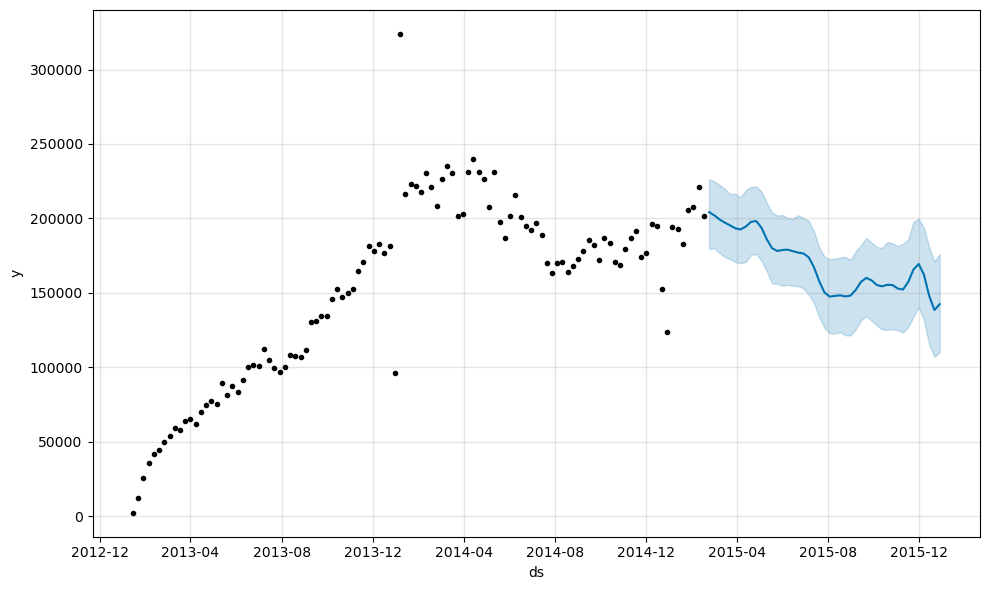

In [152]:
prophet.plot(forecast_pred);

In [153]:
future = prophet.make_future_dataframe(periods=71, freq='W', include_history=False)

In [154]:
future

,ds
0,2015-02-22
1,2015-03-01
2,2015-03-08
3,2015-03-15
4,2015-03-22
...,...
66,2016-05-29
67,2016-06-05
68,2016-06-12
69,2016-06-19


In [155]:
prophetpred = prophet.predict(future[-24:])

In [156]:
prophetpred = prophetpred['yhat']

In [157]:
# Previsão de receita para os próximos seis meses

prophetpred

0     179635.232552
1     179355.423408
2     176422.843948
3     176268.733898
4     178677.357850
5     180059.350981
6     178596.456056
7     175742.342465
8     173411.107750
9     171609.760883
10    169616.528648
11    168255.189775
12    169299.076971
13    172442.916553
14    174253.905821
15    171323.201634
16    164201.533876
17    157191.114378
18    153971.800069
19    154177.766996
20    154774.682951
21    154038.626660
22    152917.321730
23    152373.003003
Name: yhat, dtype: float64

In [158]:
prophetpred_mape = mean_absolute_percentage_error(y_test[-24:], prophetpred)

print('MAPE =', round(prophetpred_mape, 2))

MAPE = 0.19


In [159]:
six = cross_validation(prophet, horizon='24 W')

  0%|          | 0/2 [00:00<?, ?it/s]

17:44:20 - cmdstanpy - INFO - Chain [1] start processing
17:44:21 - cmdstanpy - INFO - Chain [1] done processing
17:44:21 - cmdstanpy - INFO - Chain [1] start processing
17:44:22 - cmdstanpy - INFO - Chain [1] done processing


In [160]:
# Porcentagem de erro para cada semana

performance_metrics(six)['mape']

0     0.160680
1     0.209750
2     0.232846
3     0.215911
4     0.236763
5     0.314979
6     0.344817
7     0.312759
8     0.306775
9     0.310036
10    0.336351
11    0.376642
12    0.340983
13    0.329222
14    0.402918
15    0.534840
16    0.520132
17    0.480437
18    0.557533
19    0.502353
20    0.411598
21    0.393536
22    0.485517
Name: mape, dtype: float64

# Comparativo

In [161]:
# Construindo tabela para comparação de score MAPE

score = {'Model': ['Linear Regression', 'Arima', 'Simple Deep learning', 'Deep Learning LSTM', 'Random Forest', 'XGBRegressor', 'Prophet'],
         'Score Mape': [linreg_mape, arima_mape, simpledeep_mape, deepLSTM_mape, forest_mape, xgb_mape, prophetpred_mape]}
          

In [162]:
df_score = pd.DataFrame(score)

In [163]:
# Organizando o Score por ordem crescente e arredondando para duas casas decimais

df_score = round(df_score.sort_values('Score Mape'), 2)

In [164]:
# Comparativo do score dos modelos com mean absolute Percentage error

df_score

,Model,Score Mape
3,Deep Learning LSTM,0.09
0,Linear Regression,0.10
4,Random Forest,0.11
5,XGBRegressor,0.13
1,Arima,0.14
6,Prophet,0.19
2,Simple Deep learning,1.00


In [165]:
import eli5
from eli5 import show_prediction

eli5.show_weights(forest, feature_names = list(X_test_standard))

Weight,Feature
0.3017 ± 0.3001,t - 1
0.2204 ± 0.4756,t - 5
0.2025 ± 0.4583,t - 4
0.1388 ± 0.3641,t - 2
0.1366 ± 0.3791,t - 3


In [166]:
eli5.show_prediction(forest, X_test_standard['t - 5'][0:5], feature_names = list(X_test_standard)[0:5], show_feature_values=True)

In [167]:
eli5.explain_weights(forest)

Weight,Feature
0.3017 ± 0.3001,x0
0.2204 ± 0.4756,x4
0.2025 ± 0.4583,x3
0.1388 ± 0.3641,x1
0.1366 ± 0.3791,x2


In [168]:
eli5.explain_prediction(forest, forest_pred[0:5])

Explanation(estimator="RandomForestRegressor(criterion='absolute_error')", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=173685.375, std=None, value=1.0), FeatureWeight(feature='x0', weight=32651.98, std=None, value=216213.79), FeatureWeight(feature='x3', weight=3863.0550000000003, std=None, value=217911.11), FeatureWeight(feature='x4', weight=2809.935, std=None, value=186324.09), FeatureWeight(feature='x2', weight=672.73, std=None, value=214554.71)], neg=[FeatureWeight(feature='x1', weight=-999.365, std=None, value=217429.39)], pos_remaining=0, neg_remaining=0), proba=None, score=212683.71, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)